In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import numpy as np

In [2]:
data = pd.read_csv("../data/contributions.dat")

In [3]:
Cs = []
Sd = []
Ed = []
Md = []
for year in [13, 14, 15, 16, 17, 18]:
    md = []
    starting_day = calendar.weekday(year=year, month=1, day=1)

    if calendar.isleap(2000+year):
        tdays = 366
    else:
        tdays = 365
        
    tot_days = 371
    C = np.zeros(tot_days)
    
    log_year = data.loc[data['Y'] == year]
    
    for month in range(1,13):
        first_month_day = int(datetime.strptime("{0}{1}{2}".format(2000+year, month, 1), "%Y%m%d").strftime('%j'))
        md.append(first_month_day/7+0.5)
        log_month = log_year.loc[log_year['M'] == month]
        
        for day in range(1,32):
            log_day = log_month.loc[log_month['D'] == day]

            try:
                log_c = log_day['C'].values[0]
            except:
                continue
            
            idx = int(datetime.strptime("{0}{1}{2}".format(2000+year, month, day), "%Y%m%d").strftime('%j'))-1
            C[idx+starting_day] = log_c
            
    Ed.append(tot_days-tdays-starting_day)
    Sd.append(starting_day)     
    Cs.append(C)
    Md.append(md)

In [4]:
calendar.isleap(2019)

False

In [19]:
def spalma(C, c=0, s=0):
    for j in range(C.shape[1]):
        for i in range(C.shape[0]):
            if C[i,j] != 0:
                if s:
                    c += C[i,j]*0.96
                    C[i,j] = c
                continue
            else:
                if c > 0:
                    C[i,j] = c
                    c -= 1
    return C, c   

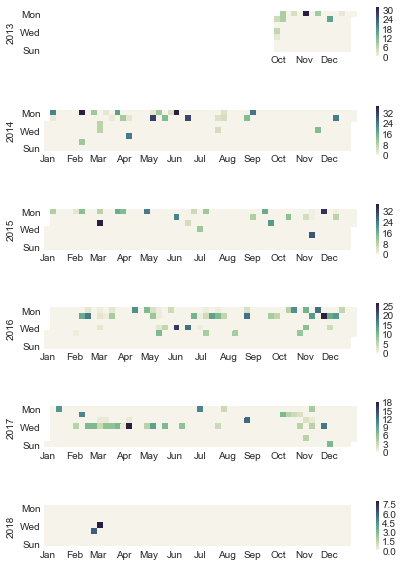

In [20]:
sns.set_style("white")
fig = plt.figure(1, figsize=(7, 10))
fig.clf()
grid = plt.GridSpec(6, 1, hspace=1)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[1,0])
ax3 = fig.add_subplot(grid[2,0])
ax4 = fig.add_subplot(grid[3,0])
ax5 = fig.add_subplot(grid[4,0])
ax6 = fig.add_subplot(grid[5,0])

axs = [ax1, ax2, ax3, ax4, ax5, ax6]
cmap = sns.cubehelix_palette(100, start=.5, rot=-.75, light=0.95, as_cmap=True)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
c = 0
Ys = [2013, 2014, 2015, 2016, 2017, 2018]
for ax, C, S, E, M, Y in zip(axs, Cs, Sd, Ed, Md, Ys):
    mask = np.zeros_like(C)
    mask[:S] = 1
    mask[-E-1:] = 1
    mask = mask.reshape((-1,7)).T
    
    Ct = C.copy().reshape((-1,7)).T
    Ct, c = spalma(Ct, c)
 
    if ax == ax1:
        mask[:,:39] = 1
        mask[0,39] = 1 
        M = M[-3:]
        months_x = months[-3:]
    else:
        months_x = months
    
    sns.heatmap(Ct, cbar=1, square=1, linewidths=0., cmap=cmap, robust=1, ax=ax, mask=mask,
               yticklabels=3, vmax=np.max(Ct))
    ax.set_xticks(M)
    ax.set_xticklabels(months_x)
    ax.set_yticklabels(["Mon", "Wed", "Sun"], rotation=0)
    ax.set_ylabel(Y)
#     ax.set(yticks=[])

In [7]:
milestones = []

start = [(Md[0][0]+0.5,1.5, "x")]

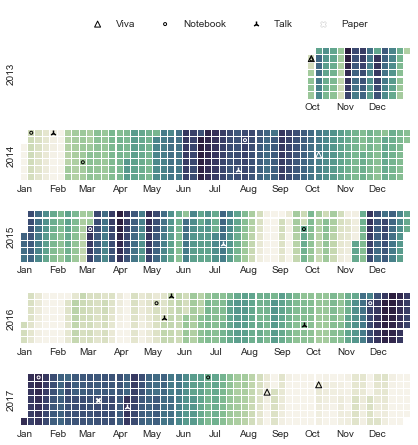

In [8]:
sns.set_style("white")
fig = plt.figure(1, figsize=(7, 7))
fig.clf()
grid = plt.GridSpec(5, 1, hspace=.5)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[1,0])
ax3 = fig.add_subplot(grid[2,0])
ax4 = fig.add_subplot(grid[3,0])
ax5 = fig.add_subplot(grid[4,0])
# ax6 = fig.add_subplot(grid[5,0])

axs = [ax1, ax2, ax3, ax4, ax5, ax6]
cmap = sns.cubehelix_palette(100, start=.5, rot=-.75, light=0.95, as_cmap=True)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
c = 0
Ys = [2013, 2014, 2015, 2016, 2017, 2018]
for ax, C, S, E, M, Y in zip(axs, Cs[:-1], Sd, Ed, Md, Ys):
    mask = np.zeros_like(C)
    mask[:S] = 1
    mask[-E-1:] = 1
    mask = mask.reshape((-1,7)).T
    
    Ct = C.copy().reshape((-1,7)).T
    Ct, c = spalma(Ct, c, 1)
 
    if ax == ax1:
        mask[:,:39] = 1
        mask[0,39] = 1 
        M = M[-3:]
        months_x = months[-3:]
    else:
        months_x = months
    
    sns.heatmap(Ct, cbar=0, square=1, linewidths=0.1, cmap=cmap, robust=1, ax=ax, mask=mask,
               yticklabels=3, vmax=np.max(Ct))
    ax.set_xticks(M)
    ax.set_xticklabels(months_x)
#     ax.set_yticklabels(["Mon", "Wed", "Sun"], rotation=0)
    ax.set(yticks=[])
    ax.set_ylabel(Y)
    
ax = ax1 
ax1.scatter(39.5,1.5, marker='^', facecolors='none', edgecolor='k', label="Viva")
ax1.scatter(39.5,1.6, marker='.', facecolors='none', edgecolor='k')

ax = ax2
ax2.scatter(1.5, 0.5, marker='.', facecolors='none', edgecolor='k', clip_on=0, label="Notebook")
ax2.scatter(4.5, 0.5, marker='2', color='k', label="Talk") #cistib
ax2.scatter(8.5, 4.5, marker='.', facecolors='none', edgecolor='k')
ax2.scatter(29.5, 5.5, marker='2', color='w') #rhh
ax2.scatter(30.5, 1.5, marker='.', facecolors='none', edgecolor='w')
ax2.scatter(40.5, 3.5, marker='^', facecolors='none', edgecolor='w')

ax = ax3
ax3.scatter(9.5, 2.5, marker='.', facecolors='none', edgecolor='w')
ax3.scatter(27.5, 4.5, marker='2', color='w') #cmbe
ax3.scatter(38.5, 2.5, marker='.', facecolors='none', edgecolor='k')

ax = ax4
ax4.scatter(18.5, 1.5, marker='.', facecolors='none', edgecolor='k')
ax4.scatter(19.5, 3.5, marker='2', color='k') #tours
ax4.scatter(20.5, 0.5, marker='2', color='k') #early career researchers
ax4.scatter(38.5, 4.5, marker='2', color='k') #cure
ax4.scatter(47.5, 1.5, marker='.', facecolors='none', edgecolor='w')

ax = ax5
ax5.scatter(2.5, 0.5, marker='.', facecolors='none', edgecolor='w')
ax5.scatter(10.5, 3.5, marker='X', color='w', edgecolor='k', linewidths=0.1, label="Paper")
ax5.scatter(14.5, 4.5, marker='2', color='w') #ahm
ax5.scatter(25.5, 0.5, marker='.', facecolors='none', edgecolor='k', clip_on=0)
ax5.scatter(33.5, 2.5, marker='^', facecolors='none', edgecolor='k')
ax5.scatter(40.5, 1.5, marker='^', facecolors='none', edgecolor='k')
plt.figlegend(loc=(0.2, 0.925), ncol=4)

plt.savefig('logbook', format='png', dpi=800)